In [371]:
!pip install imutils

In [372]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import cv2
import zipfile as zf
import imutils
import tensorflow as tf
import random

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPool2D,AveragePooling2D,Dropout
from keras.optimizers import Adam,RMSprop,SGD
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.models import model_from_json

from imutils import paths,build_montages

sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person

/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1270-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0400-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0466-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0631-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0969-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0481-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1326-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0772-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0326-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0534-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0456-0001.jpeg
/kaggle/input/chest-xra

/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0666-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1142-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1295-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0476-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0831-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0557-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0673-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0871-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1008-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0579-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1164-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0490-0001.j

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person489_bacteria_2067.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1717_bacteria_4536.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1338_virus_2308.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person257_bacteria_1194.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person348_virus_719.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1346_virus_2322.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1424_bacteria_3651.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person766_bacteria_2670.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person18_bacteria_57.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person274_virus_563.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person721_virus_1340.jpeg
/kaggle/input/c

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person487_bacteria_2058.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1645_bacteria_4363.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1351_bacteria_3441.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person259_bacteria_1219.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person70_bacteria_344.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person354_bacteria_1632.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person258_bacteria_1208.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person326_bacteria_1505.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person162_virus_321.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1604_virus_2782.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person969_bacteria_2894.jpeg
/kagg

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person40_bacteria_204.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person592_bacteria_2431.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1486_bacteria_3881.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1525_virus_2659.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1191_virus_2032.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person583_bacteria_2409.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person698_virus_1294.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1524_bacteria_3984.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person849_bacteria_2770.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person819_virus_1455.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1372_bacteria_3503.jpeg
/kaggle/

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person749_bacteria_2652.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person616_virus_1186.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person354_bacteria_1635.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1348_virus_2326.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person124_virus_234.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person359_bacteria_1642.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person398_bacteria_1799.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1168_virus_1966.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1302_bacteria_3266.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person537_bacteria_2265.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person536_bacteria_2260.jpeg
/kaggle/i

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1571_virus_2728.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person868_virus_1513.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person348_bacteria_1603.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person50_bacteria_238.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person534_bacteria_2252.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1496_bacteria_3911.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1635_bacteria_4335.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person319_virus_646.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person972_virus_1646.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1099_virus_1819.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1912_bacteria_4817.jpeg
/kaggle/inpu

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0748-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1302-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0381-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0231-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0923-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0798-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1189-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1308-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0754-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/tra

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person545_bacteria_2287.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1598_bacteria_4195.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1040_bacteria_2974.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person809_bacteria_2717.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person581_bacteria_2393.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person582_bacteria_2405.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person351_bacteria_1619.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person469_virus_965.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person410_bact

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person928_virus_1586.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person982_bacteria_2909.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person892_bacteria_2817.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1926_bacteria_4835.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person609_virus_1176.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1247_bacteria_3203.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1088_bacteria_3028.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1812_bacteria_4667.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person62_bacte

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0015-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0029-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0033-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0315-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0322-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0107-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0246-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0019-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0102-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/NO

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONI

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1127-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0724-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1338-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0467-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1178-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0533-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0406-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0441-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0549-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0158-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1372_bacteria_3501.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person518_virus_1036.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person453_virus_935.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person940_virus_1602.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person722_virus_1341.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person340_virus_698.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person7_bacteria_24.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person415_virus_847.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person293_virus_605.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1129_virus_1857.jpeg
/kaggle/in

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person262_bacteria_1226.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person13_bacteria_49.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person835_bacteria_2749.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1914.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1543_virus_2684.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person806_virus_1439.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person711_virus_1309.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person515_bacteria_2187.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person615_virus_1184.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person276_virus_569.jpe

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0359-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0289-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0381-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0123-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0141-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0058-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/IM-0077-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0098-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0350-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0237-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/t

In [373]:
train_pneu = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/')
train_norm = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/')

fp_train_pneu = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/'
fp_train_norm = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/'

test_pneu = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/')
test_norm = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/')

fp_test_pneu = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/'
fp_test_norm = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/'

val_pneu = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/')
val_norm = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/')

fp_val_pneu = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/'
fp_val_norm = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/'


In [374]:
train_images = []
labels = []
test_images = []
test_labels = []
val_images = []
val_labels = []
outputs = []

for i in train_pneu:
    image = cv2.imread(fp_train_pneu+i)
    image = cv2.resize(image , (64,64))
    train_images.append(image)
    labels.append(1) #1 for pneumonia
    
for i in train_norm:
    image = cv2.imread(fp_train_norm+i)
    image = cv2.resize(image , (64,64))
    train_images.append(image)
    labels.append(0) #0 for normal
    
for i in test_pneu:
    image = cv2.imread(fp_test_pneu+i)
    outputs.append(image)
    image = cv2.resize(image , (64,64))
    test_images.append(image)
    test_labels.append(1)
    
for i in test_norm:
    image = cv2.imread(fp_test_norm+i)
    outputs.append(image)
    image = cv2.resize(image , (64,64))
    test_images.append(image)
    test_labels.append(0)
    
for i in val_pneu:
    image = cv2.imread(fp_val_pneu+i)
    image = cv2.resize(image , (64,64))
    val_images.append(image)
    val_labels.append(1) #1 for pneumonia
    
for i in val_norm:
    image = cv2.imread(fp_val_norm+i)
    image = cv2.resize(image , (64,64))
    val_images.append(image)
    val_labels.append(0) #0 for normal

    

In [375]:
train_images[0].shape

(64, 64, 3)

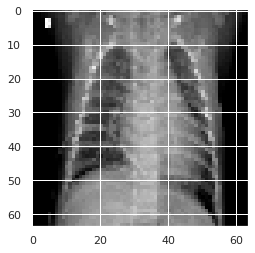

In [376]:
plt.imshow(train_images[0])

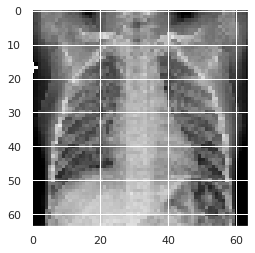

In [377]:
plt.imshow(train_images[-1])

In [378]:
train_images = np.array(train_images , dtype="float") / 255.0
test_images = np.array(test_images , dtype="float") / 255.0
val_images = np.array(val_images , dtype="float") / 255.0

labels = np.array(labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

In [379]:
train_images.shape

(5216, 64, 64, 3)

In [380]:
test_images.shape

(624, 64, 64, 3)

In [381]:
val_images.shape

(16, 64, 64, 3)

In [382]:
(trainX , testX , trainY , testY) = train_test_split(train_images,labels,test_size=0.15,train_size=0.85,random_state=42)

In [383]:
print(type(trainX))
print(trainX.shape)
print(type(trainY))
print(trainY.shape)
print(type(testX))
print(testX.shape)
print(type(testY))
print(testY.shape)


<class 'numpy.ndarray'>
(4433, 64, 64, 3)
<class 'numpy.ndarray'>
(4433,)
<class 'numpy.ndarray'>
(783, 64, 64, 3)
<class 'numpy.ndarray'>
(783,)


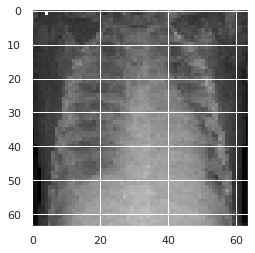

In [384]:
plt.imshow(trainX[1])

In [385]:
trainY[1]

1

In [386]:
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY , num_classes=2)

In [387]:
trainY

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [388]:
# 1 0 is normal => 0
# 0 1 is pneumonia =>1

In [389]:
testY

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [390]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = "same", activation ='relu', input_shape = (64,64,3)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(2,activation="softmax"))

In [391]:
INIT_LR = 1e-2 #1e-4/1e-3
EPOCHS = 20 #50
BS = 32 #64

#opt = SGD(lr=INIT_LR)

opt = Adam(lr=INIT_LR ,decay=INIT_LR/EPOCHS )

In [392]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

In [393]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_58 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_59 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 64)      

In [394]:
H = model.fit(trainX,trainY,epochs=EPOCHS,batch_size=BS,validation_data=(testX,testY))

Train on 4433 samples, validate on 783 samples
Epoch 1/20
4433/4433 [==============================] - 6s 1ms/step - loss: 0.3007 - accuracy: 0.8870 - val_loss: 0.8289 - val_accuracy: 0.7816
Epoch 2/20
4433/4433 [==============================] - 4s 808us/step - loss: 0.1935 - accuracy: 0.9294 - val_loss: 0.2580 - val_accuracy: 0.9055
Epoch 3/20
4433/4433 [==============================] - 3s 774us/step - loss: 0.1340 - accuracy: 0.9492 - val_loss: 0.2249 - val_accuracy: 0.9208
Epoch 4/20
4433/4433 [==============================] - 3s 767us/step - loss: 0.1185 - accuracy: 0.9544 - val_loss: 0.2062 - val_accuracy: 0.9221
Epoch 5/20
4433/4433 [==============================] - 3s 783us/step - loss: 0.0980 - accuracy: 0.9621 - val_loss: 0.3219 - val_accuracy: 0.8595
Epoch 6/20
4433/4433 [==============================] - 3s 765us/step - loss: 0.0822 - accuracy: 0.9700 - val_loss: 3.1737 - val_accuracy: 0.7152
Epoch 7/20
4433/4433 [==============================] - 3s 755us/step - loss: 0

In [395]:
predictions = model.predict(testX)
predictions

array([[2.6194207e-02, 9.7380573e-01],
       [3.1625243e-16, 1.0000000e+00],
       [9.8893309e-01, 1.1066961e-02],
       ...,
       [9.9884158e-01, 1.1584294e-03],
       [4.8294789e-01, 5.1705211e-01],
       [9.4666183e-01, 5.3338211e-02]], dtype=float32)

In [396]:
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),target_names=["normal","pneumonia"]))

              precision    recall  f1-score   support

      normal       0.99      0.82      0.90       223
   pneumonia       0.93      1.00      0.96       560

    accuracy                           0.95       783
   macro avg       0.96      0.91      0.93       783
weighted avg       0.95      0.95      0.94       783



In [397]:
cnf = confusion_matrix(testY.argmax(axis=1),predictions.argmax(axis=1))
cnf

array([[183,  40],
       [  2, 558]])

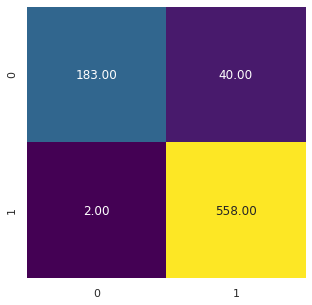

In [398]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf, cmap='viridis', cbar=False, annot=True, fmt='.2f')
plt.show()

In [399]:
acc = metrics.accuracy_score(testY.argmax(axis=1),predictions.argmax(axis=1))
acc

0.946360153256705

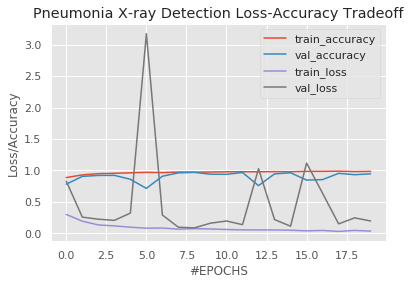

In [400]:
N = np.arange(0 , EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["accuracy"], label="train_accuracy")
plt.plot(N , H.history["val_accuracy"], label="val_accuracy")
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.xlabel("#EPOCHS")
plt.ylabel("Loss/Accuracy")
plt.title("Pneumonia X-ray Detection Loss-Accuracy Tradeoff")
plt.legend()
plt.show()



In [401]:
preds = model.predict(test_images)
preds

array([[1.8731694e-08, 1.0000000e+00],
       [2.1734052e-14, 1.0000000e+00],
       [2.8327190e-11, 1.0000000e+00],
       ...,
       [1.3088092e-01, 8.6911911e-01],
       [1.0144521e-06, 9.9999893e-01],
       [5.0081476e-03, 9.9499184e-01]], dtype=float32)

In [402]:
print(classification_report(test_labels,preds.argmax(axis=1),target_names=["normal","pneumonia"]))

              precision    recall  f1-score   support

      normal       1.00      0.12      0.22       234
   pneumonia       0.66      1.00      0.79       390

    accuracy                           0.67       624
   macro avg       0.83      0.56      0.51       624
weighted avg       0.78      0.67      0.58       624



In [403]:
cnf = confusion_matrix(test_labels,preds.argmax(axis=1))
cnf

array([[ 29, 205],
       [  0, 390]])

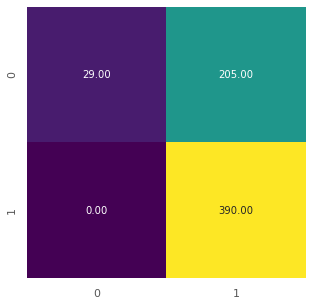

In [404]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf, cmap='viridis', cbar=False, annot=True, fmt='.2f')
plt.show()

In [405]:
acc = metrics.accuracy_score(test_labels,preds.argmax(axis=1))
acc

0.6714743589743589

In [406]:
indexes = np.random.randint(0,620,16)
indexes

array([104, 570, 398, 618,  66,  88, 290, 504, 539,  67, 180, 458, 609,
       325, 491, 310])

In [407]:
#model.save('pnemonia_model.model')

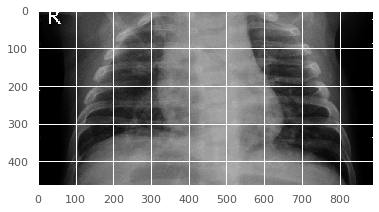

In [408]:
plt.imshow(outputs[indexes[0]])

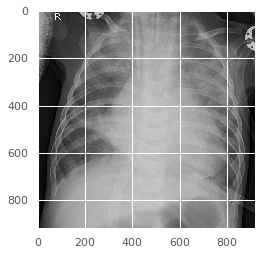

In [409]:
plt.imshow(outputs[indexes[-1]])

In [410]:
i_vals = []

for i in indexes:
    val = preds.argmax(axis=1)[i]
    i_vals.append(val)
    

In [411]:
i_vals

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [412]:
labels = []

for i in i_vals:
    if i == 1:
        labels.append('Pneumonia')
    else:
        labels.append('Normal')
    

In [413]:
labels

['Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Normal',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia']

In [414]:
vals = []

for i in indexes:
    val = np.amax(preds, axis=1)[i]
    vals.append(val)

In [415]:
vals

[1.0,
 1.0,
 0.98941714,
 0.5292431,
 1.0,
 1.0,
 1.0,
 0.9125517,
 0.9999149,
 1.0,
 1.0,
 1.0,
 0.9999218,
 1.0,
 0.998103,
 1.0]

In [416]:
vals = [i*100 for i in vals]
vals

[100.0,
 100.0,
 98.94171357154846,
 52.92431116104126,
 100.0,
 100.0,
 100.0,
 91.25517010688782,
 99.99148845672607,
 100.0,
 100.0,
 100.0,
 99.99217987060547,
 100.0,
 99.81030225753784,
 100.0]

In [417]:
vals = [round(num,2) for num in vals]
vals

[100.0,
 100.0,
 98.94,
 52.92,
 100.0,
 100.0,
 100.0,
 91.26,
 99.99,
 100.0,
 100.0,
 100.0,
 99.99,
 100.0,
 99.81,
 100.0]

In [418]:
results = []

for i in range(16):
    
    text = labels[i] + " : " + str(vals[i])
    
    outputs[i] = cv2.resize(outputs[i], (300,300))
    
    cv2.putText(outputs[i] , text, (10,40) , cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),3)
    
    results.append(outputs[i])

-1

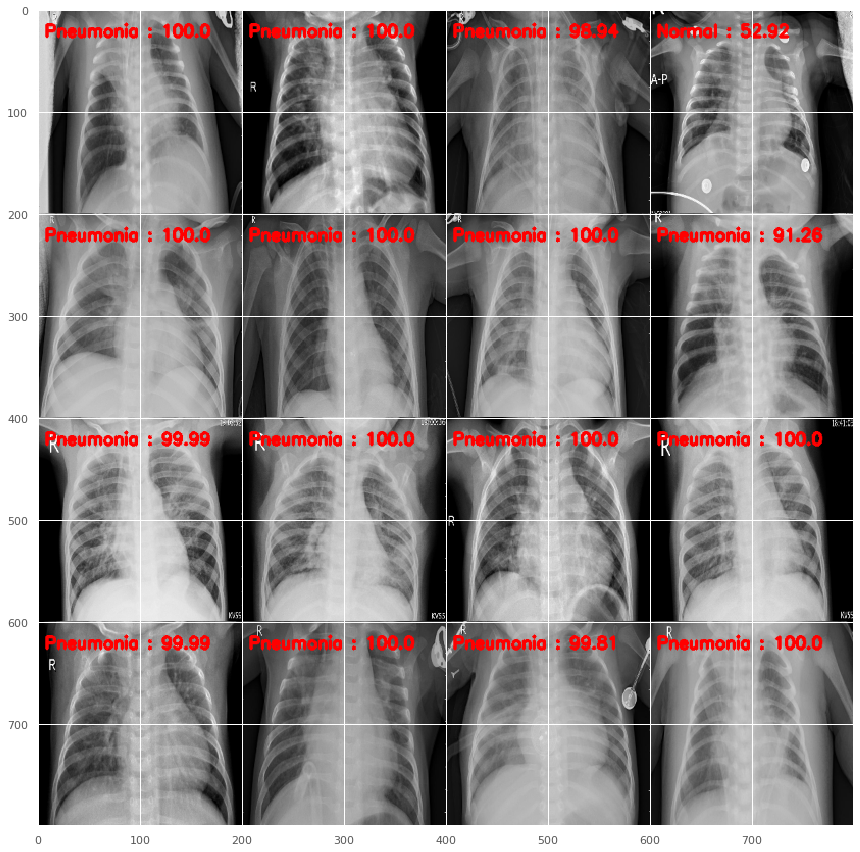

In [419]:
montage = build_montages(results,(200,200),(4,4))[0]
plt.figure(figsize=(15,15))
plt.imshow(montage)
cv2.waitKey(0)
